In [5]:
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from itertools import product

In [3]:
def imagedata(file):
    image = Image.open(file)
    data = asarray(image)
    R = []
    G = []
    B = []
    for i in data:
        for j in i:
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])
    rgb = pd.DataFrame([R,G,B]).transpose()
    rgb.columns = ['Red','Green','Blue']
    return rgb

In [11]:
orange_rgb = imagedata('orange.png')

In [1]:
def get_xy(image):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(image).size
    return list(product(np.arange(width),np.arange(height)))

In [34]:
xy = pd.DataFrame(get_xy('orange.png'), columns = ['x','y'])
xy

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
249995,499,495
249996,499,496
249997,499,497
249998,499,498


In [36]:
list(zip(range(0,256),center))

[(0, 4),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 12),
 (9, 12),
 (10, 12),
 (11, 12),
 (12, 12),
 (13, 12),
 (14, 12),
 (15, 12),
 (16, 20),
 (17, 20),
 (18, 20),
 (19, 20),
 (20, 20),
 (21, 20),
 (22, 20),
 (23, 20),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28),
 (30, 28),
 (31, 28),
 (32, 36),
 (33, 36),
 (34, 36),
 (35, 36),
 (36, 36),
 (37, 36),
 (38, 36),
 (39, 36),
 (40, 44),
 (41, 44),
 (42, 44),
 (43, 44),
 (44, 44),
 (45, 44),
 (46, 44),
 (47, 44),
 (48, 52),
 (49, 52),
 (50, 52),
 (51, 52),
 (52, 52),
 (53, 52),
 (54, 52),
 (55, 52),
 (56, 60),
 (57, 60),
 (58, 60),
 (59, 60),
 (60, 60),
 (61, 60),
 (62, 60),
 (63, 60),
 (64, 68),
 (65, 68),
 (66, 68),
 (67, 68),
 (68, 68),
 (69, 68),
 (70, 68),
 (71, 68),
 (72, 76),
 (73, 76),
 (74, 76),
 (75, 76),
 (76, 76),
 (77, 76),
 (78, 76),
 (79, 76),
 (80, 84),
 (81, 84),
 (82, 84),
 (83, 84),
 (84, 84),
 (85, 84),
 (86, 84),
 (87, 84),
 (88, 92),
 (89, 92),
 (90, 92),
 (91, 92),
 (92, 

In [32]:
full_rgb = pd.merge(xy, orange_rgb, left_index=True, right_index=True)
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    full_rgb['Red'] = full_rgb['Red'].replace(i,j)
    full_rgb['Green'] = full_rgb['Green'].replace(i,j)
    full_rgb['Blue'] = full_rgb['Blue'].replace(i,j)

In [33]:
full_rgb

,x,y,Red,Green,Blue
0,0,0,212,116,108
1,0,1,228,116,100
2,0,2,212,124,92
3,0,3,228,116,68
4,0,4,228,116,68
...,...,...,...,...,...
249995,499,495,204,124,84
249996,499,496,220,124,76
249997,499,497,220,124,76
249998,499,498,220,124,76


In [19]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [60]:
orangergb = full_rgb.iloc[:,2:].drop_duplicates()
orangergb

,Red,Green,Blue
0,212,116,108
1,228,116,100
2,212,124,92
3,228,116,68
27,220,116,76
...,...,...,...
249853,164,180,180
249887,148,180,164
249888,156,164,172
249891,148,164,164


<function matplotlib.pyplot.show(close=None, block=None)>

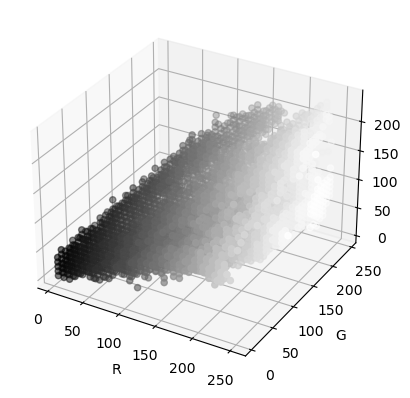

In [65]:
ax = plt.axes(projection='3d')
ax.scatter3D(orangergb['Red'], orangergb['Green'], orangergb['Blue'], c=orangergb['Red'], cmap='gray')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show

Text(0, 0.5, 'Blue')

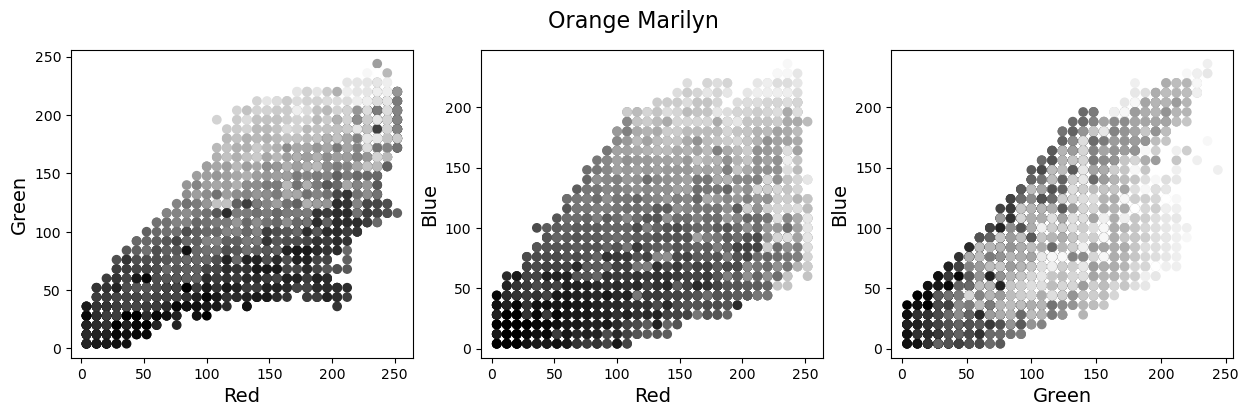

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Orange Marilyn', fontsize = 16)
ax1.scatter(orangergb['Red'], orangergb['Green'], c = orangergb['Blue'], cmap ='gray')
ax1.set_xlabel('Red', fontsize = 14)
ax1.set_ylabel('Green', fontsize = 14)
ax2.scatter(orangergb['Red'], orangergb['Blue'], c = orangergb['Green'], cmap ='gray')
ax2.set_xlabel('Red', fontsize = 14)
ax2.set_ylabel('Blue', fontsize = 14)
ax3.scatter(orangergb['Green'], orangergb['Blue'], c = orangergb['Red'], cmap ='gray')
ax3.set_xlabel('Green', fontsize = 14)
ax3.set_ylabel('Blue', fontsize = 14)

In [89]:
def reduce_rgb(rgb):
    # centering
    full_rgb = pd.merge(xy, rgb, left_index=True, right_index=True)
    center = sorted(list(range(4,256,8))*8)
    for i,j in zip(range(0,256),center):
        full_rgb['Red'] = full_rgb['Red'].replace(i,j)
        full_rgb['Green'] = full_rgb['Green'].replace(i,j)
        full_rgb['Blue'] = full_rgb['Blue'].replace(i,j)
    # dropping duplicates
    plot_rgb = full_rgb.iloc[:,2:].drop_duplicates()
    return plot_rgb

In [101]:
# function for plots
def plots3d(plot_rgb):
    ax = plt.axes(projection='3d')
    ax.scatter3D(plot_rgb['Red'], plot_rgb['Green'], plot_rgb['Blue'], c=plot_rgb['Blue'], cmap='gray')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')

Text(0.5, 0.92, 'Orange Marilyn 3d-plot')

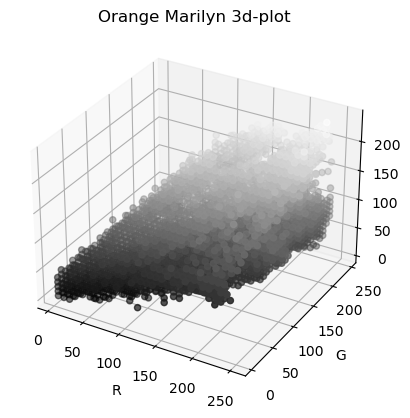

In [102]:
plots3d(reduce_rgb(orange_rgb))
plt.title('Orange Marilyn 3d-plot')

In [78]:
red_rgb = imagedata('red.png')

Text(0.5, 0.92, 'Red Marilyn 3d-plot')

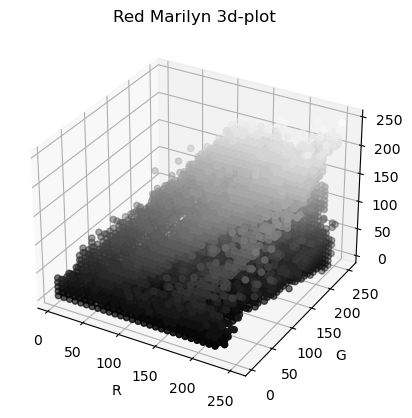

In [103]:
plots3d(reduce_rgb(red_rgb))
plt.title('Red Marilyn 3d-plot')

Text(0.5, 0.92, 'Blue Marilyn 3d-plot')

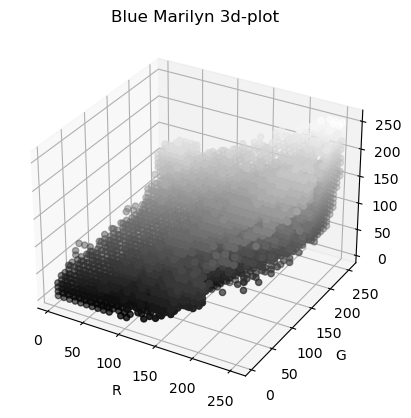

In [104]:
blue_rgb = imagedata('blue.png')
plots3d(reduce_rgb(blue_rgb))
plt.title('Blue Marilyn 3d-plot')

Text(0.5, 0.92, 'Egg Blue Marilyn 3d-plot')

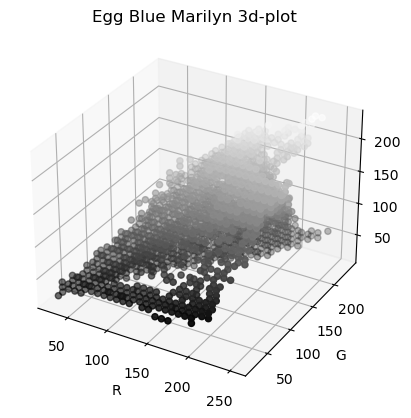

In [105]:
eggblue_rgb = imagedata('eggblue.png')
plots3d(reduce_rgb(eggblue_rgb))
plt.title('Egg Blue Marilyn 3d-plot')

Text(0.5, 0.92, 'Turquoise Marilyn 3d-plot')

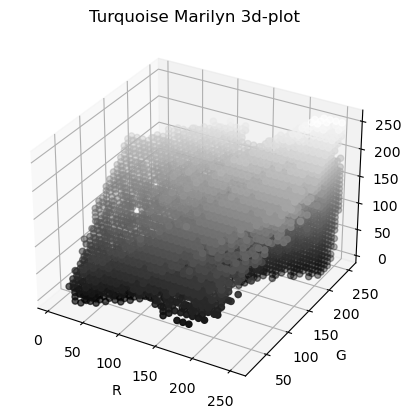

In [106]:
turq_rgb = imagedata('turq.png')
plots3d(reduce_rgb(turq_rgb))
plt.title('Turquoise Marilyn 3d-plot')

In [108]:
def plots2d(rgb):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
    #fig.suptitle('Orange Marilyn', fontsize = 16)
    ax1.scatter(rgb['Red'], rgb['Green'], c = rgb['Blue'], cmap ='gray')
    ax1.set_xlabel('Red', fontsize = 14)
    ax1.set_ylabel('Green', fontsize = 14)
    ax2.scatter(rgb['Red'], rgb['Blue'], c = rgb['Green'], cmap ='gray')
    ax2.set_xlabel('Red', fontsize = 14)
    ax2.set_ylabel('Blue', fontsize = 14)
    ax3.scatter(rgb['Green'], rgb['Blue'], c = rgb['Red'], cmap ='gray')
    ax3.set_xlabel('Green', fontsize = 14)
    ax3.set_ylabel('Blue', fontsize = 14)

Text(0.5, 0.98, 'Orange Marilyn')

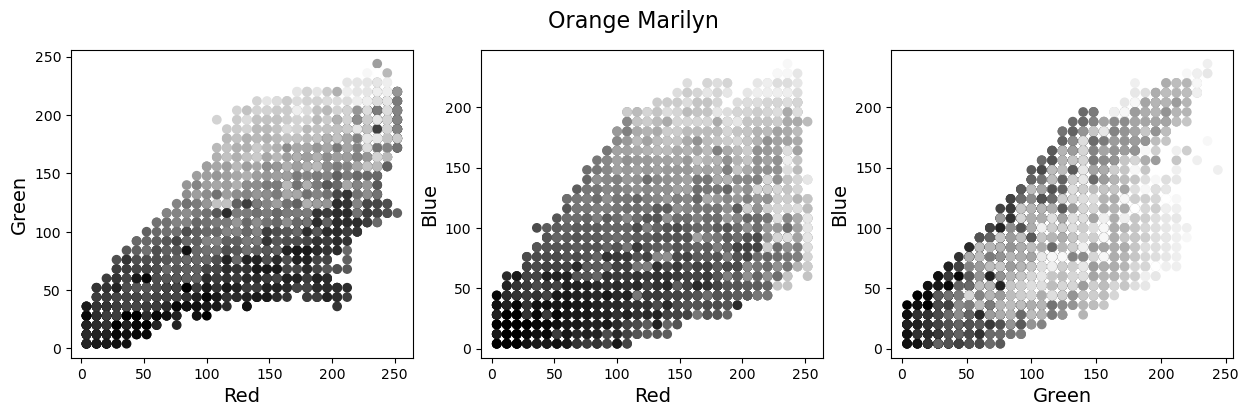

In [112]:
plots2d(reduce_rgb(orange_rgb))
plt.suptitle('Orange Marilyn', fontsize=16)

Text(0.5, 0.98, 'Red Marilyn')

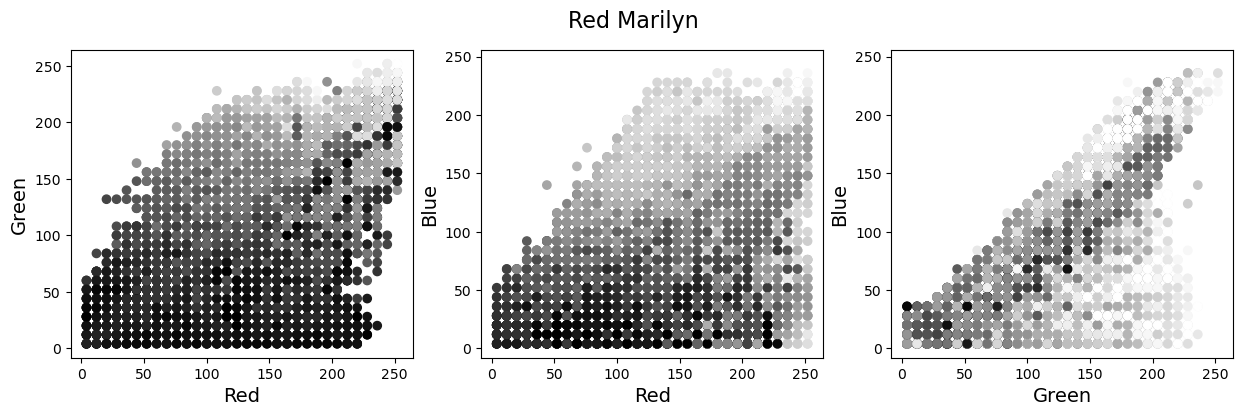

In [113]:
plots2d(reduce_rgb(red_rgb))
plt.suptitle('Red Marilyn', fontsize=16)

Text(0.5, 0.98, 'Blue Marilyn')

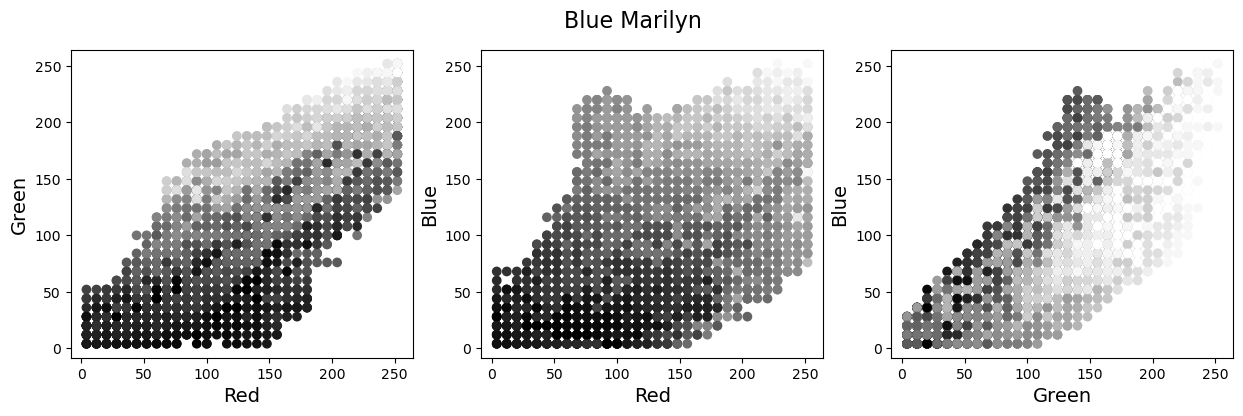

In [114]:
plots2d(reduce_rgb(blue_rgb))
plt.suptitle('Blue Marilyn', fontsize=16)

Text(0.5, 0.98, 'Egg Blue Marilyn')

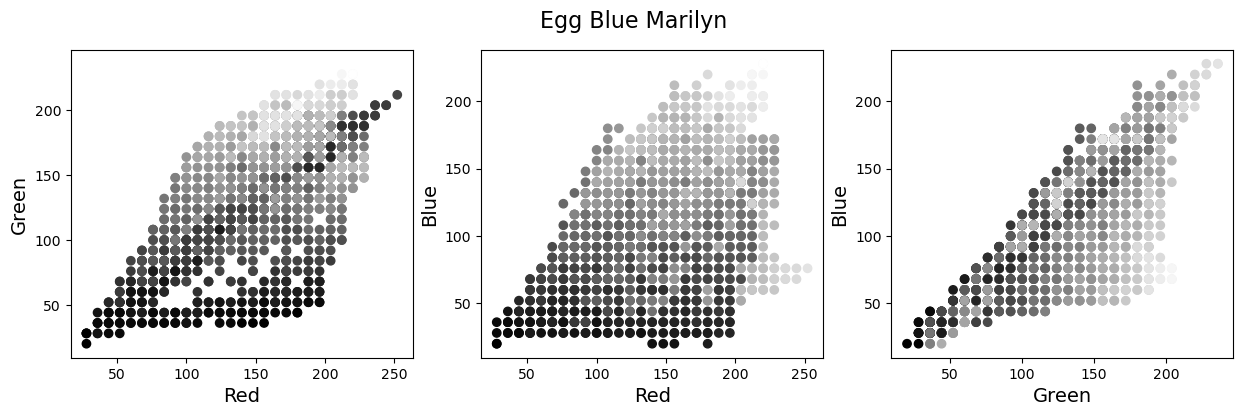

In [115]:
plots2d(reduce_rgb(eggblue_rgb))
plt.suptitle('Egg Blue Marilyn', fontsize=16)

Text(0.5, 0.98, 'Turquoise Marilyn')

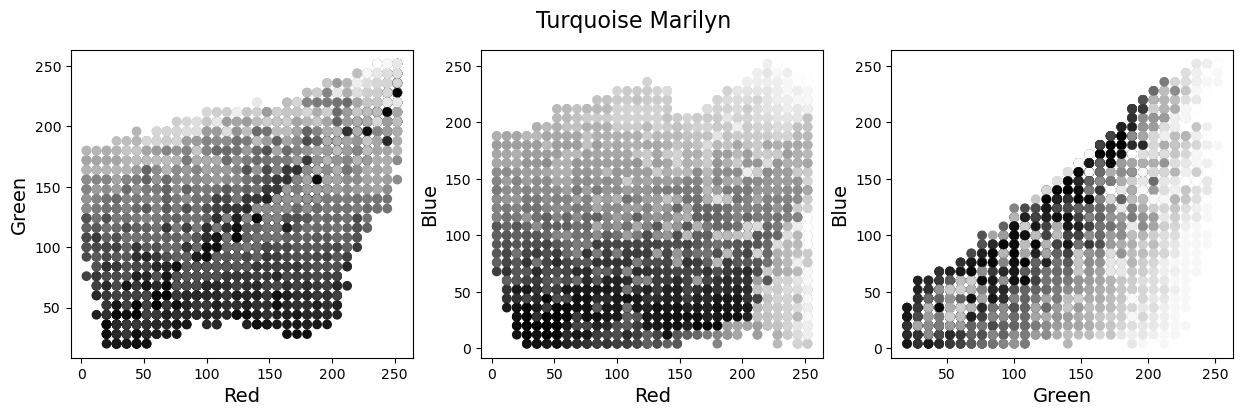

In [116]:
plots2d(reduce_rgb(turq_rgb))
plt.suptitle('Turquoise Marilyn', fontsize=16)